In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
#from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
os.chdir(r'D:\senior year\GP\datasets\Dataset-master')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0,10): #number of classes
        shutil.move(f'{i}','train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'),100) #100 sore mnn al train to valid from every class(100*10)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'),50) #50 sora mn al train to test ly kol class
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')


In [3]:
train_path = r'D:\senior year\GP\datasets\Dataset-master\train'
valid_path = r'D:\senior year\GP\datasets\Dataset-master\valid'
test_path = r'D:\senior year\GP\datasets\Dataset-master\test'

print('total dataset is 4220 image:')
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, 
    target_size=(224,224),
    batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path,
    target_size=(224,224), 
    batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    batch_size=10, 
    shuffle=False)

total dataset is 4220 image:
Found 2710 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [4]:
mobile= tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [5]:
x = mobile.layers[-6].output #hakhod al hidden layers mn mobile kolo ela akher 6
x

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 1024) dtype=float32>

In [6]:
output =  Dense(units=10, activation ='softmax')(x)
#dense new hidden layer

In [7]:
model = Model(inputs=mobile.input, outputs=output) #new model x + dense layer

In [8]:
for layer in model.layers[:-23]: #only train the last 23 layers in our new model
    layer.trainable=False 

In [9]:
model.summary() #our new model (model-6 + dense)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [10]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
history = model.fit(x=train_batches,
         steps_per_epoch=len(train_batches), #no batch size, kol epoch btakhod kol al train images
         validation_data=valid_batches,
         validation_steps=len(valid_batches),
         epochs=20,
         verbose=2)
#val watya acc 3alya = overfitting

Epoch 1/20
271/271 - 121s - loss: 1.9368 - accuracy: 0.3066 - val_loss: 2.0345 - val_accuracy: 0.3130
Epoch 2/20
271/271 - 103s - loss: 1.0571 - accuracy: 0.6601 - val_loss: 1.7756 - val_accuracy: 0.4450
Epoch 3/20
271/271 - 103s - loss: 0.7134 - accuracy: 0.7911 - val_loss: 1.3062 - val_accuracy: 0.5320
Epoch 4/20
271/271 - 103s - loss: 0.4913 - accuracy: 0.8867 - val_loss: 1.1132 - val_accuracy: 0.5950
Epoch 5/20
271/271 - 102s - loss: 0.3274 - accuracy: 0.9358 - val_loss: 1.3700 - val_accuracy: 0.5180
Epoch 6/20
271/271 - 102s - loss: 0.2469 - accuracy: 0.9583 - val_loss: 1.1687 - val_accuracy: 0.5870
Epoch 7/20
271/271 - 102s - loss: 0.1863 - accuracy: 0.9760 - val_loss: 1.3424 - val_accuracy: 0.5540
Epoch 8/20
271/271 - 102s - loss: 0.1449 - accuracy: 0.9819 - val_loss: 1.0426 - val_accuracy: 0.6380
Epoch 9/20
271/271 - 102s - loss: 0.1176 - accuracy: 0.9867 - val_loss: 1.2139 - val_accuracy: 0.6040
Epoch 10/20
271/271 - 102s - loss: 0.0901 - accuracy: 0.9900 - val_loss: 1.1012 - 

In [12]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,

In [13]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


In [14]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
cm

array([[39,  3,  0,  3,  0,  0,  0,  3,  0,  2],
       [10, 32,  0,  4,  0,  0,  0,  3,  1,  0],
       [ 3,  0,  9,  2,  4,  1,  3, 26,  1,  1],
       [ 7,  1,  0, 33,  3,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  1, 30,  1,  3, 15,  0,  0],
       [ 1,  0,  0,  0,  3, 15,  0, 27,  2,  2],
       [ 4,  1,  0,  2,  7,  0, 20, 14,  0,  2],
       [ 0,  0,  0,  0,  0,  1,  0, 49,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  8, 34,  6],
       [ 2,  1,  0,  0,  0,  0,  0,  2,  8, 37]], dtype=int64)

In [15]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
    #this function prints and plots the confusion matrix
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                horizontalalignment = "center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('true/real label')
    plt.xlabel('predicted label')

In [16]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

confusion matrix, without normalization
[[39  3  0  3  0  0  0  3  0  2]
 [10 32  0  4  0  0  0  3  1  0]
 [ 3  0  9  2  4  1  3 26  1  1]
 [ 7  1  0 33  3  0  0  6  0  0]
 [ 0  0  0  1 30  1  3 15  0  0]
 [ 1  0  0  0  3 15  0 27  2  2]
 [ 4  1  0  2  7  0 20 14  0  2]
 [ 0  0  0  0  0  1  0 49  0  0]
 [ 2  0  0  0  0  0  0  8 34  6]
 [ 2  1  0  0  0  0  0  2  8 37]]


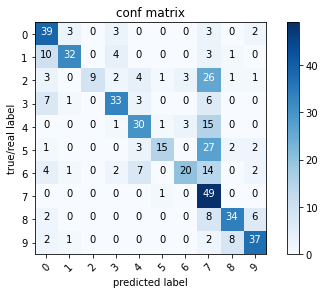

In [17]:
cm_plot_labels=['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="conf matrix")

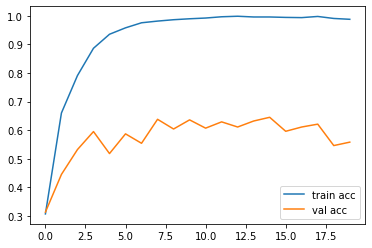

In [18]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# test_x=np.array(test_samples)
# y_pred=model.predict(test_x)
# y_pred=np.argmax(y_pred,axis=1)

y_pred=predictions.argmax(axis=1)
print(classification_report(y_pred,test_batches.classes))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66        68
           1       0.64      0.84      0.73        38
           2       0.18      1.00      0.31         9
           3       0.66      0.73      0.69        45
           4       0.60      0.64      0.62        47
           5       0.30      0.83      0.44        18
           6       0.40      0.77      0.53        26
           7       0.98      0.32      0.48       153
           8       0.68      0.74      0.71        46
           9       0.74      0.74      0.74        50

    accuracy                           0.60       500
   macro avg       0.60      0.72      0.59       500
weighted avg       0.74      0.60      0.60       500

